In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("C:\Machine Learning Projects\Fraud Detection using Machine Learning\data\Imported_data.csv")
display(df.head())      ## (or) df.head() This will display the first 5 rows of the dataset


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [18]:
df.columns = df.columns.str.strip()
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

    Step 1: Handling Missing Values:
Impute missing values (e.g., mean, median, mode, or using advanced techniques like KNN).

_**In our scenario we don't have any missing values in the dataset**_

    Step 2. Encoding Categorical Variables:

Apply methods like one-hot encoding, label encoding, or target encoding.

_**We will perform the data encoding steps below**_

In [19]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder with drop='first' and sparse_output=False
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform the 'type' column
encoded = encoder.fit_transform(df[['type']])

# Get the feature names for the encoded columns
feature_names = encoder.get_feature_names_out(['type'])

# Add the encoded columns directly to the original DataFrame
df[feature_names] = encoded

# Drop the original 'type' column
df.drop(columns=['type'], inplace=True)

# Display the updated DataFrame
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0.0,0.0,1.0,0.0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0.0,0.0,1.0,0.0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0.0,0.0,0.0,1.0
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1.0,0.0,0.0,0.0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0.0,0.0,1.0,0.0


### Observation:

Applied one-hot encoding on the categorical variable `type`.


    Step 3. Feature Transformation:
Apply transformations like log, square root, or power transformations to normalize or reduce skewness.

In [20]:
# Check skewness of the 'amount' column
amount_skewness = df['amount'].skew()
print(f"Skewness of 'amount': {amount_skewness}")


Skewness of 'amount': 30.99394948249038


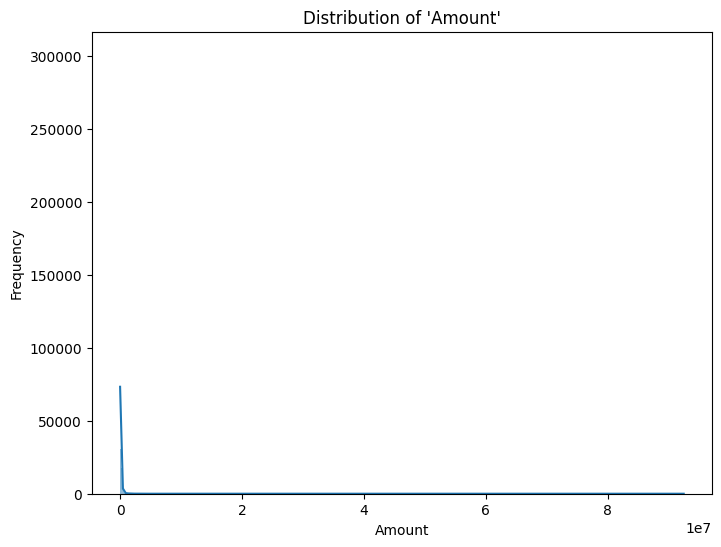

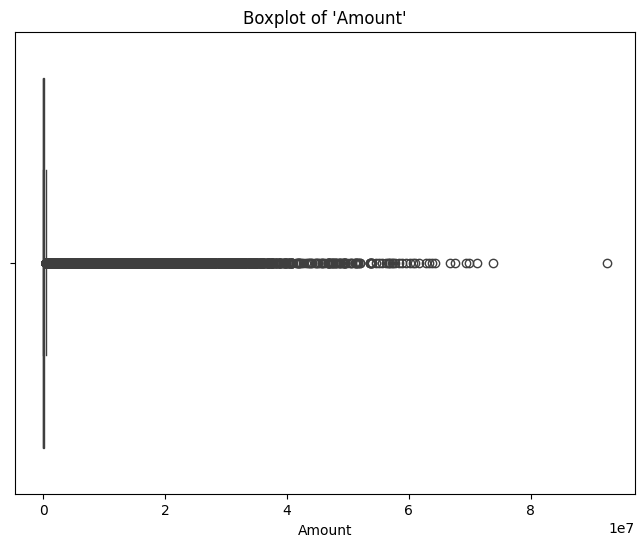

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['amount'], kde=True)
plt.title("Distribution of 'Amount'")
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Plot boxplot for visualizing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['amount'])
plt.title("Boxplot of 'Amount'")
plt.xlabel('Amount')
plt.show()


In [22]:
import numpy as np

# Apply log transformation
df['amount_log'] = np.log1p(df['amount'])  # np.log1p ensures no error for zero values


In [24]:
# Apply square root transformation
df['amount_sqrt'] = np.sqrt(df['amount'])


In [26]:
print(f"Skewness of transformed 'amount for sqrt': {df['amount_sqrt'].skew()}")

Skewness of transformed 'amount for sqrt': 3.661257886451743


In [27]:
print(f"Skewness of transformed 'amount for log ': {df['amount_log'].skew()}")

Skewness of transformed 'amount for log ': -0.5550183204227738
